# Assignment 3(2): C7
Description: Use your dataset to make VAR model. You need to consider endogenous/exogeneous, causation, impulse function, instrumental variables and others based upon Chapter 7.

# Covered Processes: 
## Correlation Heatmap, Pair Plots, ADF Test, AIC & BIC, VAR Model, Granger Causality, Impulse Test, Variance Decomposition 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

# Define the stock symbols and date range
stocks = ['NERD', 'TCEHY', 'BILI']
start_date = '2019-06-10'
end_date = '2021-10-17'

# Download the historical stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)

# Select the 'Adj Close' column for each stock
stock_prices = stock_data['Adj Close']

# Resample the data to a weekly frequency (Friday)
weekly_stock_prices = stock_prices.resample('W-FRI').last()

# Calculate log returns
log_returns = np.log(1 + weekly_stock_prices.pct_change())

# Rename columns for clarity
log_returns.columns = [f'{col}_Log_Return' for col in log_returns.columns]

# Remove rows with NaN values
log_returns = log_returns.dropna()

# Calculate the correlation matrix
correlation_matrix = log_returns.corr()

[*********************100%%**********************]  3 of 3 completed


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

# Define the stock symbols and date range
stocks = ['NERD', 'TCEHY', 'BILI']
start_date = '2019-06-10'
end_date = '2021-10-17'

# Download the historical stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)

# Select the 'Adj Close' column for each stock
stock_prices = stock_data['Adj Close']

# Resample the data to a weekly frequency (Friday)
weekly_stock_prices = stock_prices.resample('W-FRI').last()

# Calculate log returns
log_returns = np.log(1 + weekly_stock_prices.pct_change())

# Rename columns for clarity
log_returns.columns = [f'{col}_Log_Return' for col in log_returns.columns]

# Remove rows with NaN values
log_returns = log_returns.dropna()

[*********************100%%**********************]  3 of 3 completed


In [3]:
# Calculate the correlation matrix
correlation_matrix = log_returns.corr()

In [4]:
from statsmodels.tsa.stattools import pacf_ols
import numpy as np
import pandas as pd

# Define the log return data
# Assuming you have a DataFrame log_returns with columns for each stock's log returns

# Maximum number of lags to consider
max_lags = 20

# Initialize lists to store AIC and BIC values
aic_values = []
bic_values = []

# Calculate AIC and BIC for different lag lengths for each column
for column in log_returns.columns:
    for lag in range(1, max_lags + 1):
        partial_acf = pacf_ols(log_returns[column], nlags=lag, efficient=False)
        
        # Calculate AIC and BIC based on partial autocorrelation values
        aic = -2 * np.log(partial_acf).sum()
        bic = -2 * np.log(partial_acf).sum() + (lag + 1) * np.log(len(log_returns))
        
        aic_values.append(aic)
        bic_values.append(bic)

# Find the lag length that minimizes AIC and BIC
optimal_lag_aic = np.argmin(aic_values) + 1  # Adding 1 to convert to 1-based index
optimal_lag_bic = np.argmin(bic_values) + 1

print("Optimal Lag (AIC):", optimal_lag_aic)
print("Optimal Lag (BIC):", optimal_lag_bic)

Optimal Lag (AIC): 2
Optimal Lag (BIC): 2


/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_28639/2628702592.py:21: RuntimeWarning: invalid value encountered in log
  aic = -2 * np.log(partial_acf).sum()
/var/folders/qx/s6g45t_92j3940tn09bpp3yc0000gn/T/ipykernel_28639/2628702592.py:22: RuntimeWarning: invalid value encountered in log
  bic = -2 * np.log(partial_acf).sum() + (lag + 1) * np.log(len(log_returns))


In [5]:
from statsmodels.tsa.stattools import pacf

# Define the log return data
# Assuming you have a DataFrame log_returns with columns for each stock's log returns

# Calculate multivariate ACF for lag 2
lag = 2
multivariate_acf = np.zeros((len(log_returns.columns), len(log_returns.columns)))
for i in range(len(log_returns.columns)):
    for j in range(len(log_returns.columns)):
        multivariate_acf[i, j] = acf(log_returns[log_returns.columns[i]], nlags=lag)[lag]

# Calculate multivariate PACF for lag 2 for each stock
multivariate_pacf = []
for column in log_returns.columns:
    pacf_values = pacf(log_returns[column], nlags=lag)
    multivariate_pacf.append(pacf_values[lag])
    print(pacf_values)

# Plot multivariate ACF
plt.figure(figsize=(10, 6))
plt.imshow(multivariate_acf, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Multivariate ACF (Lag 2)')
plt.xticks(range(len(log_returns.columns)), log_returns.columns, rotation=45)
plt.yticks(range(len(log_returns.columns)), log_returns.columns)
plt.show()

# Plot multivariate PACF
plt.figure(figsize=(10, 6))
plt.bar(log_returns.columns, multivariate_pacf)
plt.title('Multivariate PACF (Lag 2)')
plt.xlabel('Stocks')
plt.ylabel('PACF Value')
plt.xticks(rotation=45)
plt.show()

NameError: name 'acf' is not defined

In [6]:
from statsmodels.tsa.stattools import grangercausalitytests

# Set a range of lag orders to explore
lag_orders = [1, 2, 3, 4, 5]

# Significance level
alpha = 0.05

# Perform the Granger causality test for different lag orders for all pairs of stocks
for effect in log_returns.columns:
    for cause in log_returns.columns:
        if effect != cause:
            print(f"Granger causality from {cause} to {effect}:")

            data = pd.DataFrame({
                'Effect': log_returns[effect],
                'Cause': log_returns[cause]
            })

            for lag in lag_orders:
                results = grangercausalitytests(data, lag, verbose=False)
                p_value = results[lag][0]['ssr_ftest'][1]

                if p_value < alpha:
                    print(f'  Lag {lag}: p-value = {p_value} (Reject H0: Granger causality)')
                else:
                    print(f'  Lag {lag}: p-value = {p_value} (Fail to reject H0)')


Granger causality from NERD_Log_Return to BILI_Log_Return:
  Lag 1: p-value = 0.8551653251617003 (Fail to reject H0)
  Lag 2: p-value = 0.6602672921615238 (Fail to reject H0)
  Lag 3: p-value = 0.2348296923332958 (Fail to reject H0)
  Lag 4: p-value = 0.09671608908379935 (Fail to reject H0)
  Lag 5: p-value = 0.1893304458877658 (Fail to reject H0)
Granger causality from TCEHY_Log_Return to BILI_Log_Return:
  Lag 1: p-value = 0.23975681764462942 (Fail to reject H0)
  Lag 2: p-value = 0.2381352187367927 (Fail to reject H0)
  Lag 3: p-value = 0.12084810664259829 (Fail to reject H0)
  Lag 4: p-value = 0.13982770583352497 (Fail to reject H0)
  Lag 5: p-value = 0.1430766412304177 (Fail to reject H0)
Granger causality from BILI_Log_Return to NERD_Log_Return:
  Lag 1: p-value = 0.27978141268499446 (Fail to reject H0)
  Lag 2: p-value = 0.3870502862953046 (Fail to reject H0)
  Lag 3: p-value = 0.0420836885621561 (Reject H0: Granger causality)
  Lag 4: p-value = 0.016941230410417254 (Reject H0: 

In [7]:
import numpy as np
import yfinance as yf
from statsmodels.tsa.api import VAR

# Rest of your code for data preparation (log_returns, etc.)

# Fit a VAR model using the training data (assuming you have already done this)
model = VAR(log_returns)
lag_order = 2  # Choose the lag order based on previous analysis
results = model.fit(lag_order)

# Perform variance decomposition
variance_decomp = results.variance_decomposition(10)  # You can specify the number of periods (e.g., 10)

# Print and plot variance decomposition
print(variance_decomp)
variance_decomp.plot()
plt.title('Variance Decomposition')
plt.xlabel('Periods Ahead')
plt.ylabel('Percentage')
plt.show()


AttributeError: 'VARResults' object has no attribute 'variance_decomposition'

           BILI_Log_Return  NERD_Log_Return  TCEHY_Log_Return
Period 1          0.007318         0.000000          0.000000
Period 2          0.000671         0.000669          0.000000
Period 3          0.000571         0.000142          0.000893
Period 4          0.009005         0.000013          0.000116
Period 5          0.001012         0.000718          0.000059
Period 6          0.000767         0.000119          0.001426
Period 7          0.008837         0.000128          0.000001
Period 8          0.000933         0.000853          0.000038
Period 9          0.000770         0.000222          0.001078
Period 10         0.008999         0.000186          0.000011
Period 11         0.000946         0.000919          0.000022
Period 12         0.000811         0.000259          0.001004
Period 13         0.008927         0.000169          0.000002
Period 14         0.000948         0.000913          0.000027
Period 15         0.000803         0.000253          0.001055
Period 1

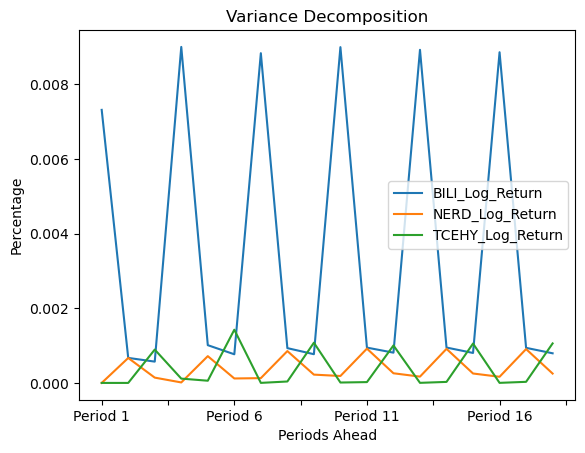

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.api import VAR

# Rest of your code for data preparation (log_returns, etc.)

# Fit a VAR model
model = VAR(log_returns)
results = model.fit(2)  # You can specify the lag order (e.g., 2) based on your analysis

# Perform impulse response analysis and plot the impulse response functions
irf = results.irf(5)  # You can specify the number of periods (e.g., 5)

# Extract the IRF values for the selected variable
irf_values = irf.orth_irfs

# Calculate the cumulative sum of the IRF values for the selected variable
cumulative_irf_values = np.cumsum(irf_values, axis=0)

# Calculate the variance decomposition for the selected variable
variance_decomp = cumulative_irf_values ** 2

# Reshape the variance decomposition data
variance_decomp_reshaped = variance_decomp.reshape(-1, len(log_returns.columns))

# Create an index for the periods
periods_index = [f'Period {i}' for i in range(1, len(variance_decomp_reshaped) + 1)]

# Convert the variance decomposition data to a Pandas DataFrame
variance_decomp_df = pd.DataFrame(variance_decomp_reshaped, columns=log_returns.columns, index=periods_index)

# Print and plot variance decomposition
print(variance_decomp_df)
variance_decomp_df.plot()
plt.title('Variance Decomposition')
plt.xlabel('Periods Ahead')
plt.ylabel('Percentage')
plt.show()



In [17]:
results.fevd().summary()

FEVD for BILI_Log_Return
     BILI_Log_Return  NERD_Log_Return  TCEHY_Log_Return
0           1.000000         0.000000          0.000000
1           0.982953         0.001706          0.015341
2           0.957687         0.009414          0.032899
3           0.956429         0.010083          0.033488
4           0.955973         0.010128          0.033899
5           0.955966         0.010132          0.033902
6           0.955962         0.010132          0.033906
7           0.955962         0.010132          0.033906
8           0.955962         0.010132          0.033906
9           0.955962         0.010132          0.033906

FEVD for NERD_Log_Return
     BILI_Log_Return  NERD_Log_Return  TCEHY_Log_Return
0           0.500722         0.499278          0.000000
1           0.492003         0.466861          0.041136
2           0.489812         0.467792          0.042395
3           0.488666         0.467503          0.043831
4           0.488566         0.467412          0.0440

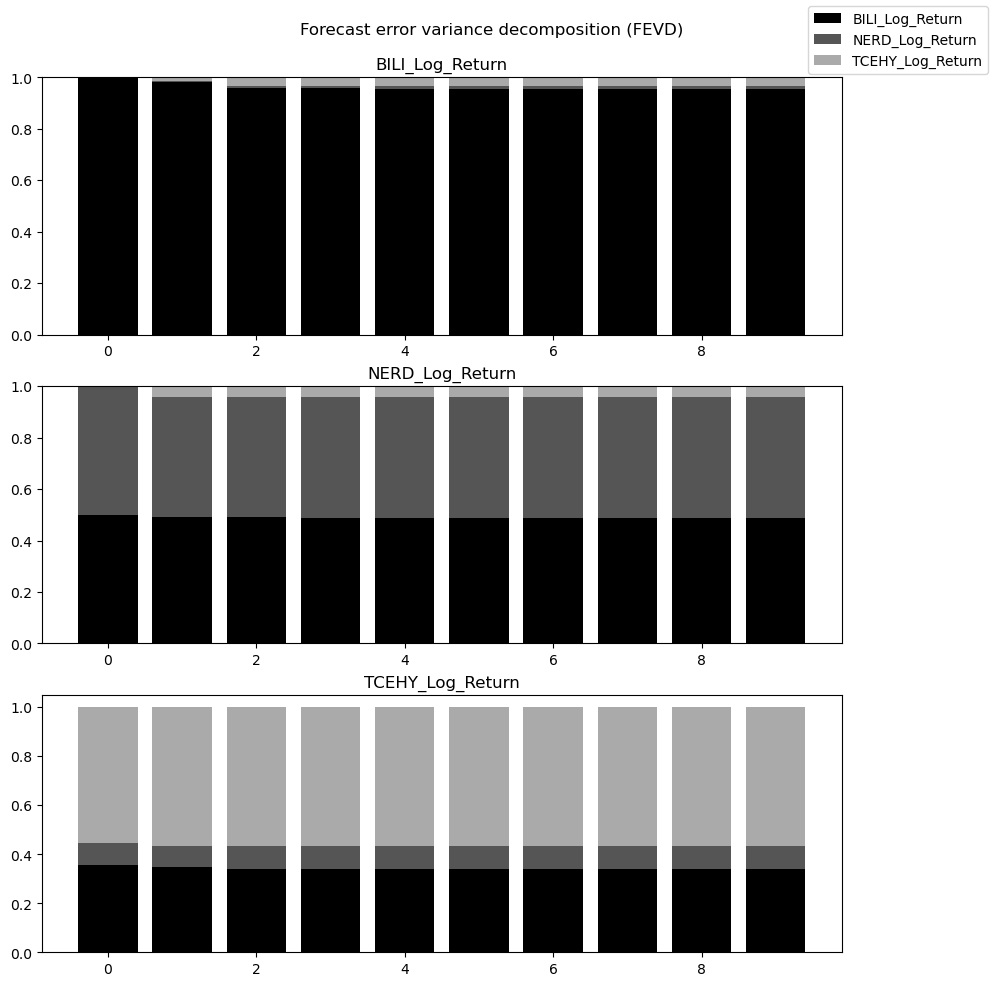

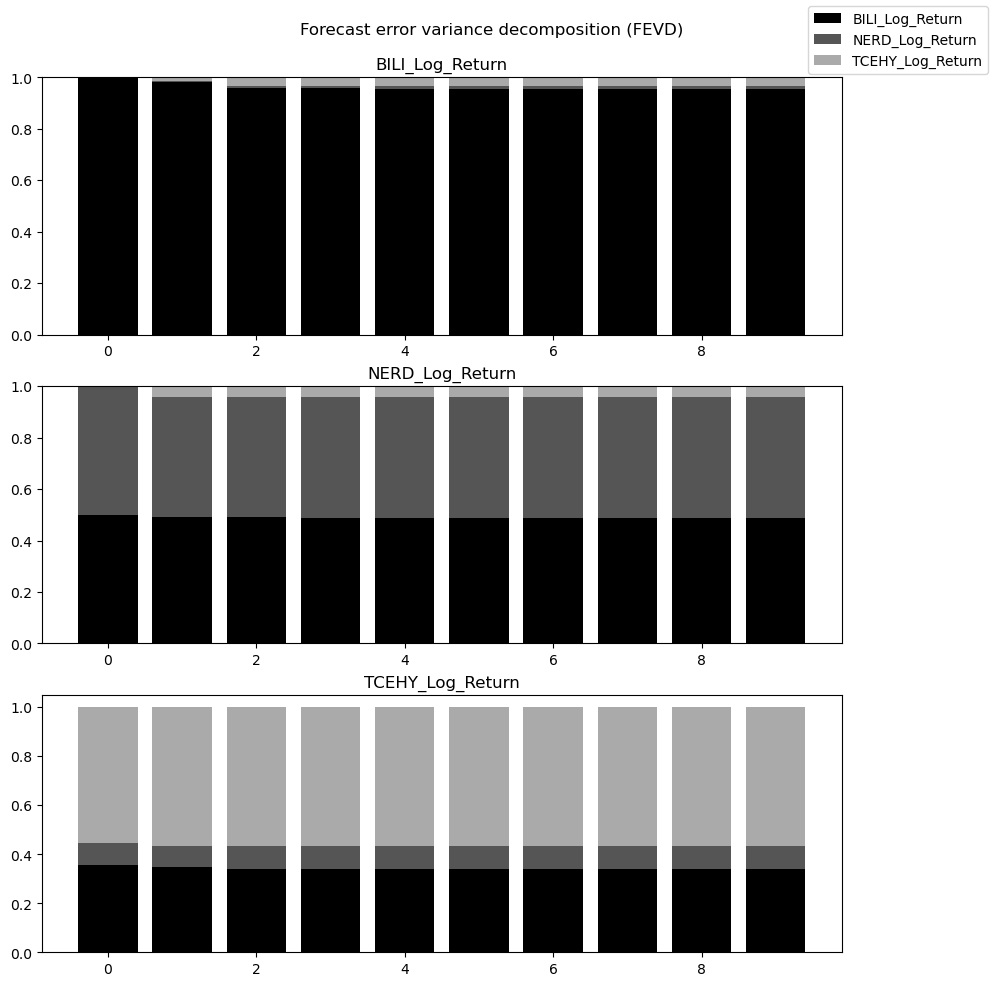

In [18]:
results.fevd().plot()

In [19]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 25, Oct, 2023
Time:                     17:34:49
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -18.5909
Nobs:                     120.000    HQIC:                  -18.8806
Log likelihood:           654.905    FPE:                5.18073e-09
AIC:                     -19.0787    Det(Omega_mle):     4.37042e-09
--------------------------------------------------------------------
Results for equation BILI_Log_Return
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.010801         0.007977            1.354           0.176
L1.BILI_Log_Return          0.017054         0.136437            0.125           0.901
L1.NERD_Log_Return        

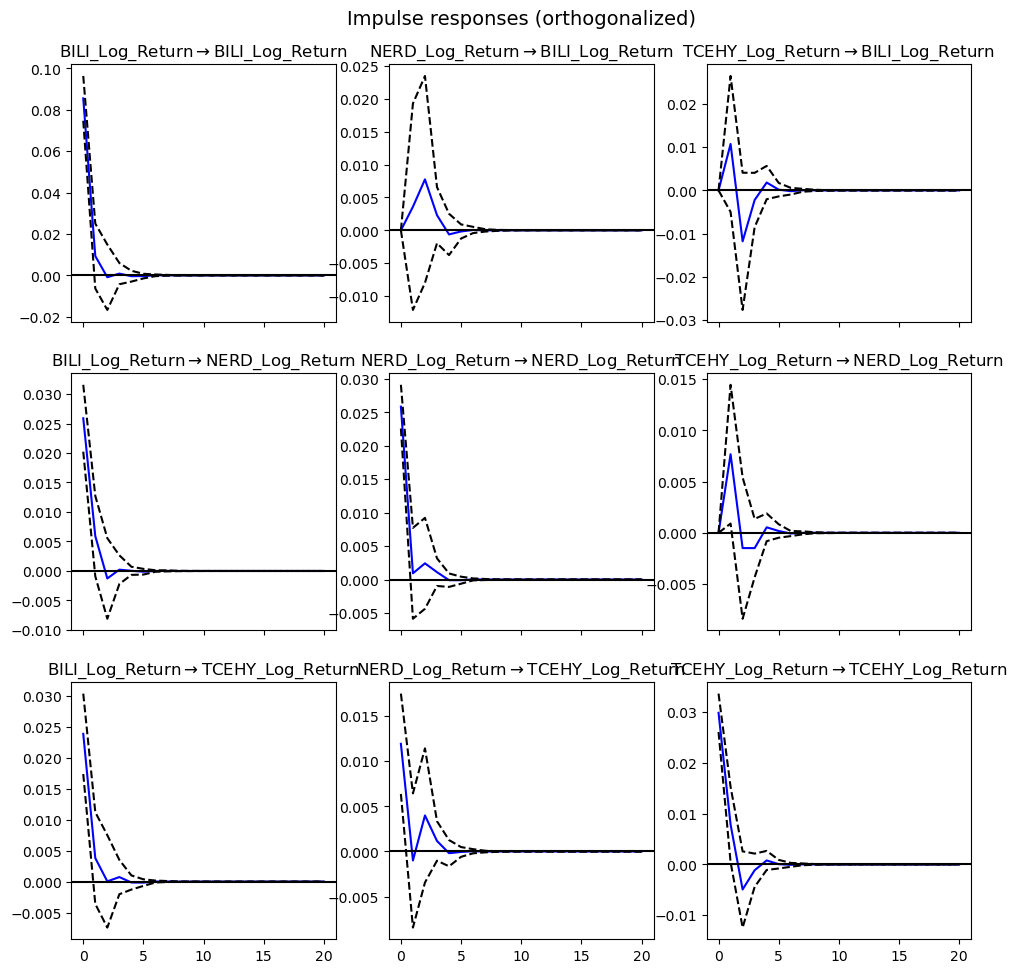

In [20]:
irf = results.irf(20)  # You can specify the number of periods (e.g., 10)
irf.plot(orth=True)  # 'orth=True' for orthogonalized IRFs
plt.show()

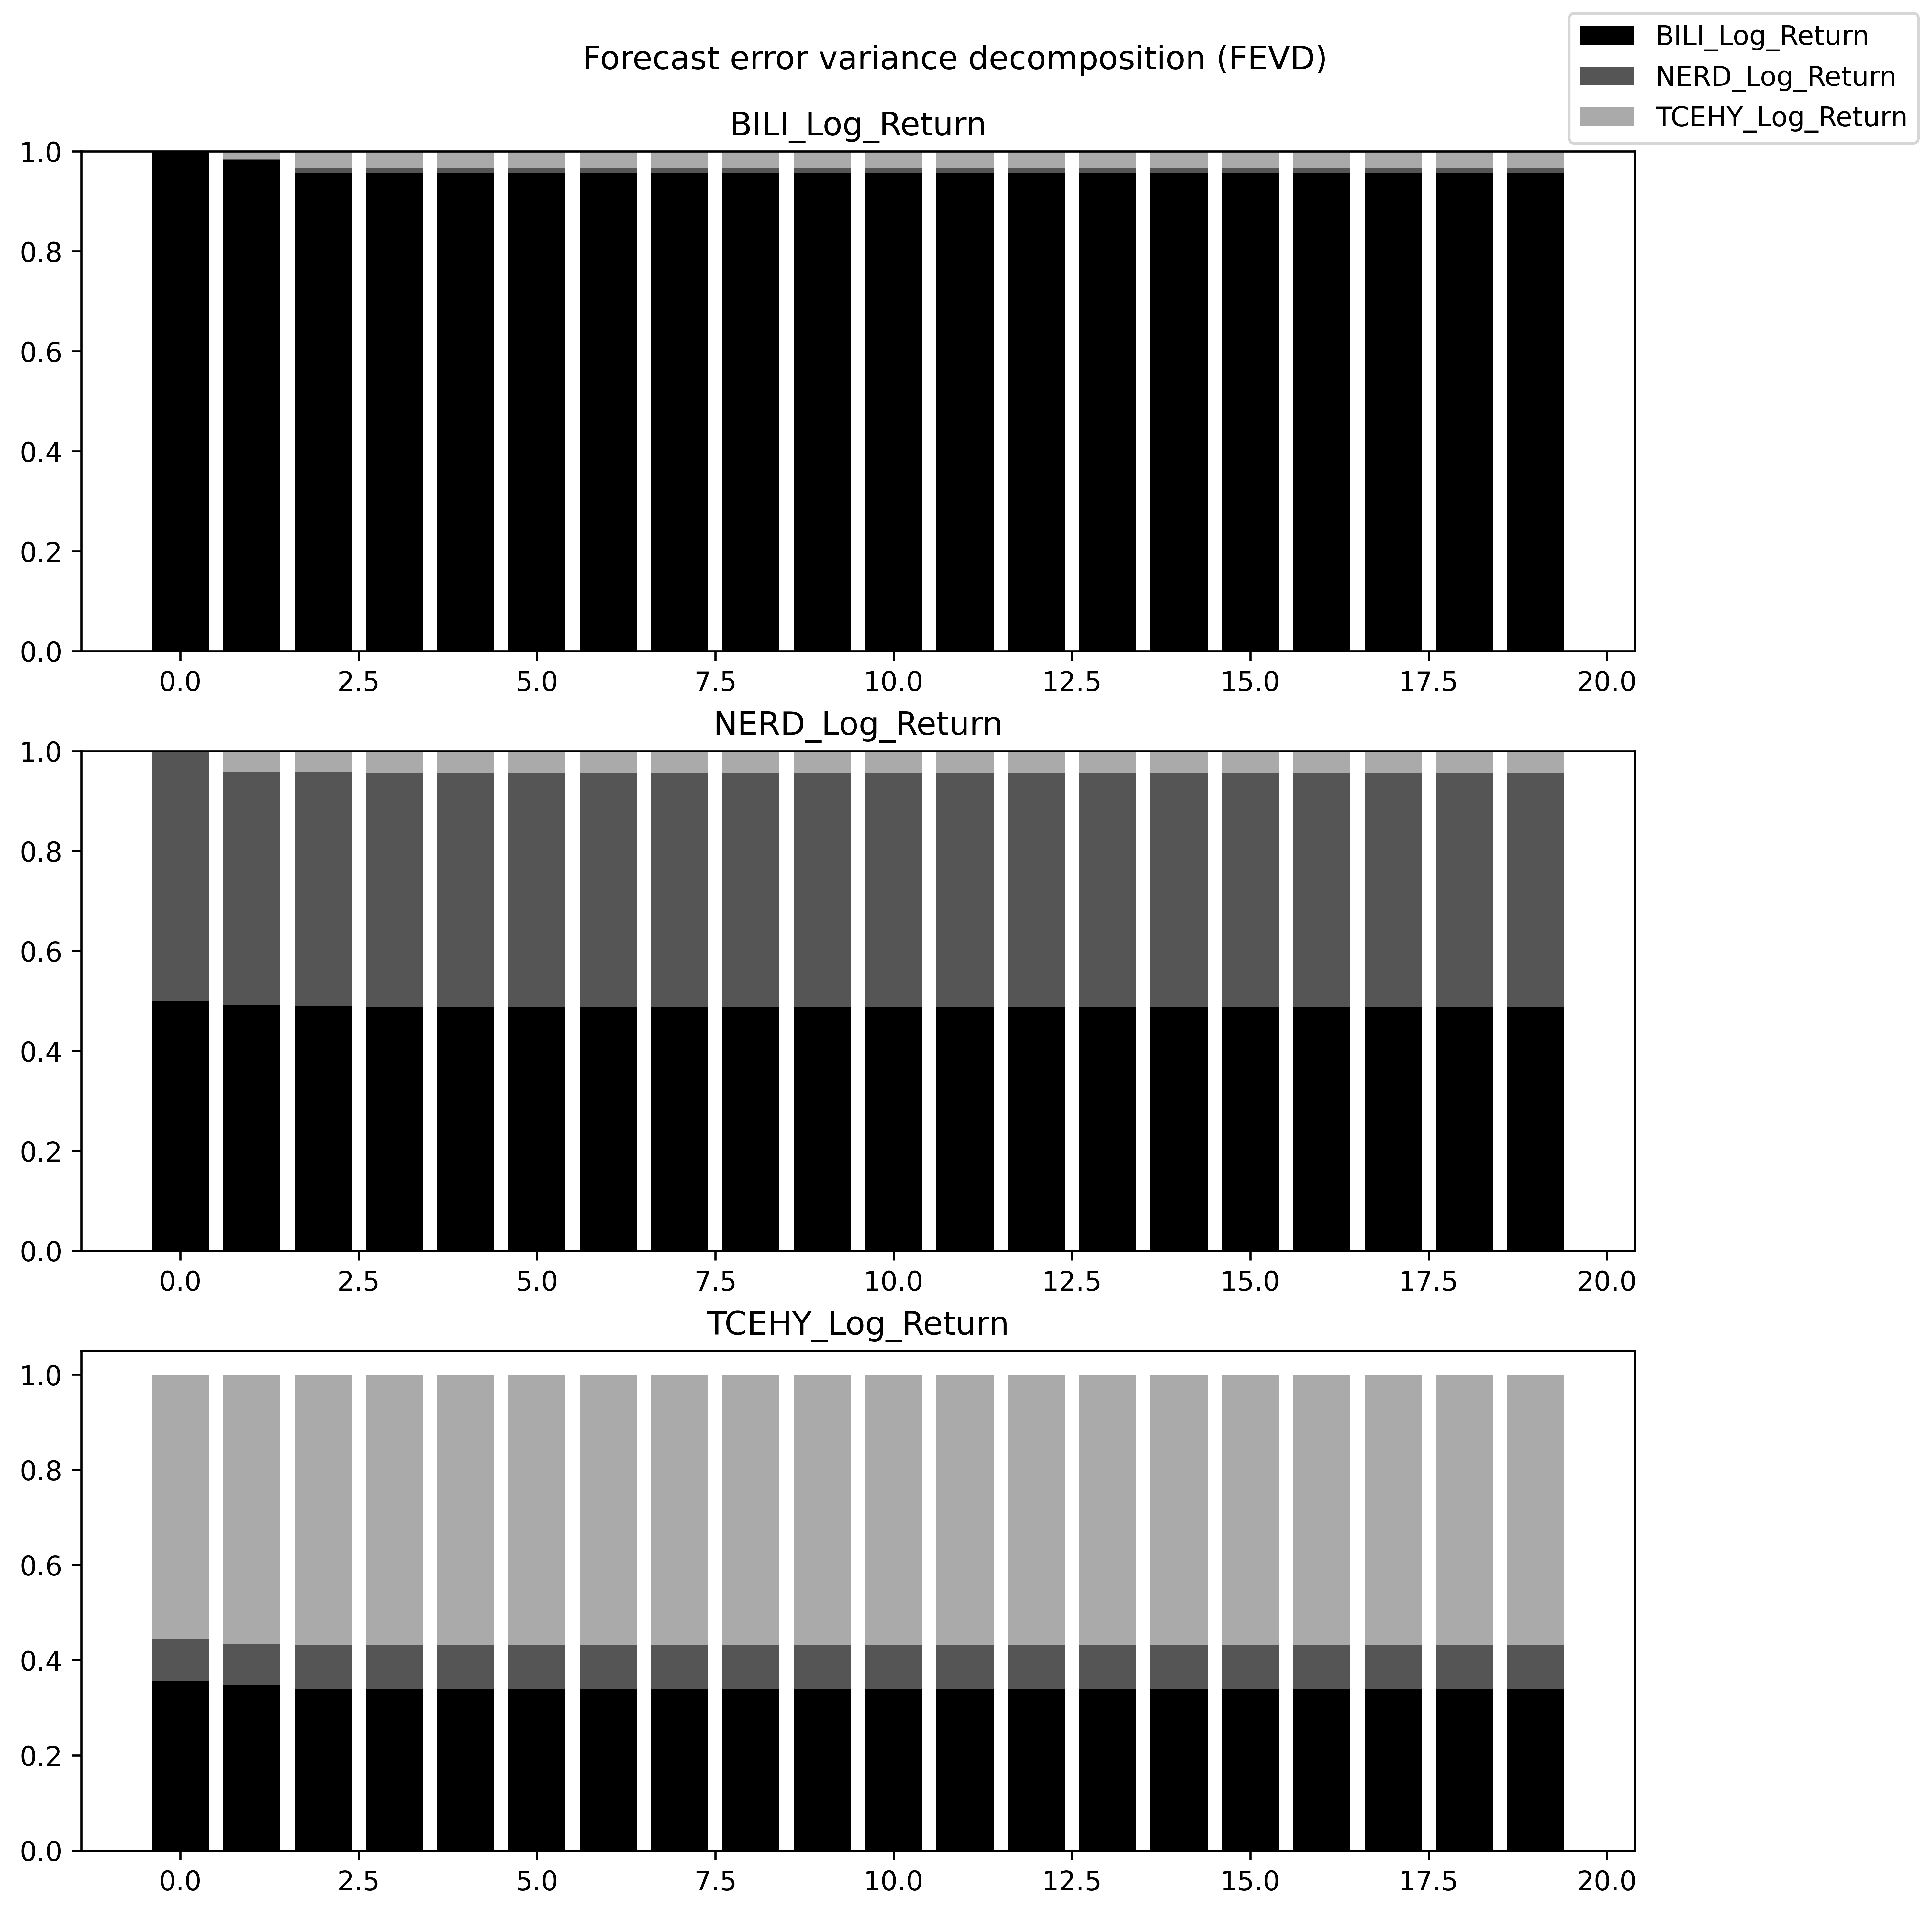

In [22]:
fevd = results.fevd(20)
fig = fevd.plot()
fig.set_dpi(600)
plt.show()